In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:

df = pd.read_csv('/content/train_data.csv')
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [6]:
df.shape

(19104, 13)

In [7]:
df['LastWorkingDate'].isnull()

0         True
1         True
2        False
3         True
4         True
         ...  
19099     True
19100     True
19101     True
19102     True
19103     True
Name: LastWorkingDate, Length: 19104, dtype: bool

In [8]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [9]:
df['Year_of_join'] = df['Dateofjoining'].apply(lambda t:t.year)
df['Month_of_join'] = df['Dateofjoining'].apply(lambda t:t.month)
df['Day_of_join'] = df['Dateofjoining'].apply(lambda t:t.day)
df['Year_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.year)
df['Month_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.month)

In [10]:
df.drop(columns='Dateofjoining',inplace=True)

In [11]:
df = df.astype({'Year_of_join':int,'Month_of_join':int,'Day_of_join':int})
df['Attrition']=np.where(df['LastWorkingDate'].isnull(),0,1)


In [12]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,NaT,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,NaT,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,2016-03-11,1,1,0,2,2015,12,24,2016.0,3.0,1
3,2017-11-01,2,31,Male,C7,Master,67016,NaT,2,2,0,1,2017,11,6,NaN,NaN,0
4,2017-12-01,2,31,Male,C7,Master,67016,NaT,2,2,0,1,2017,11,6,NaN,NaN,0


In [13]:
df.drop(columns='LastWorkingDate',inplace=True)

In [14]:
df.head(3)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1


In [15]:
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Year_of_join                0
Month_of_join               0
Day_of_join                 0
Year_of_leave           17488
Month_of_leave          17488
Attrition                   0
dtype: int64

In [16]:
#df.dropna(inplace=True)

In [17]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1
3,2017-11-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0
4,2017-12-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0


In [18]:
df.dtypes

MMM-YY                   object
Emp_ID                    int64
Age                       int64
Gender                   object
City                     object
Education_Level          object
Salary                    int64
Joining Designation       int64
Designation               int64
Total Business Value      int64
Quarterly Rating          int64
Year_of_join              int64
Month_of_join             int64
Day_of_join               int64
Year_of_leave           float64
Month_of_leave          float64
Attrition                 int64
dtype: object

In [19]:
df['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

In [20]:
df['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,2016-02-01,1,28,Male,C23,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,2016-03-01,1,28,Male,C23,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1
3,2017-11-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0
4,2017-12-01,2,31,Male,C7,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0


In [23]:
df.drop(['MMM-YY','City'],axis =1, inplace =True)

In [24]:
df.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Year_of_leave,Month_of_leave,Attrition
0,1,28,Male,Master,57387,1,1,2381060,2,2015,12,24,NaN,NaN,0
1,1,28,Male,Master,57387,1,1,-665480,2,2015,12,24,NaN,NaN,0
2,1,28,Male,Master,57387,1,1,0,2,2015,12,24,2016.0,3.0,1
3,2,31,Male,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0
4,2,31,Male,Master,67016,2,2,0,1,2017,11,6,NaN,NaN,0


In [25]:
df.drop(['Year_of_leave','Month_of_leave'],axis =1, inplace =True)

#LABEL ENCODING

In [26]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])


In [27]:
le.fit(df['Education_Level'])
df['Education_Level'] = le.transform(df['Education_Level'])

In [28]:
df.head()

,Emp_ID,Age,Gender,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Year_of_join,Month_of_join,Day_of_join,Attrition
0,1,28,1,2,57387,1,1,2381060,2,2015,12,24,0
1,1,28,1,2,57387,1,1,-665480,2,2015,12,24,0
2,1,28,1,2,57387,1,1,0,2,2015,12,24,1
3,2,31,1,2,67016,2,2,0,1,2017,11,6,0
4,2,31,1,2,67016,2,2,0,1,2017,11,6,0


In [29]:
df['Attrition'].unique()

array([0, 1])

In [30]:
df.dtypes

Emp_ID                  int64
Age                     int64
Gender                  int64
Education_Level         int64
Salary                  int64
Joining Designation     int64
Designation             int64
Total Business Value    int64
Quarterly Rating        int64
Year_of_join            int64
Month_of_join           int64
Day_of_join             int64
Attrition               int64
dtype: object

In [31]:
df['Attrition'].value_counts()

0    17488
1     1616
Name: Attrition, dtype: int64

In [32]:
x =df.drop('Attrition',axis=1)
y = df['Attrition']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


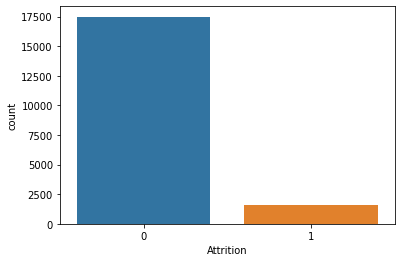

In [33]:
import seaborn as sns

sns.countplot(df['Attrition'])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x, y)
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (19104, 12)
Shape of X after SMOTE: (34976, 12)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition, dtype: float64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.5)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
#Train the model
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=1)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 1 ... 1 1 1]

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      8724
           1       0.71      0.91      0.79      8764

    accuracy                           0.76     17488
   macro avg       0.79      0.76      0.76     17488
weighted avg       0.79      0.76      0.76     17488



In [41]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

print(cf_matrix)

[[5411 3313]
 [ 815 7949]]


In [42]:
print(accuracy_score(y_test, predictions)*100 )

76.39524245196706
